In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [99]:
set_A = pd.read_csv('data/set_A.csv')
set_B = pd.read_csv('data/set_B.csv')

C:\Users\sobot\AppData\Local\Temp\ipykernel_13760\2630139720.py:1: DtypeWarning: Columns (0,1,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  set_A = pd.read_csv('C:/Users/sobot/Desktop/WSZYSTKO/Optimization Methods/set_A.csv')


In [100]:
df = pd.concat([set_A, set_B], ignore_index=True)

In [101]:
df.head()

,iddate2,iddate3,Date,Open,High,Low,Close,Volume,nazwapl,numtime,id_n2,id
0,1Nov2022,'AAPL'].xlsx,20221031 21:48:30,153.51,153.51,153.51,153.51,1,file28800S30secs1Nov2022['AAPL'].xlsx,31oct2022 21:48:30,NaN,NaN
1,1Nov2022,'AAPL'].xlsx,20221031 21:49:00,153.51,153.51,153.51,153.51,0,file28800S30secs1Nov2022['AAPL'].xlsx,31oct2022 21:49:00,NaN,NaN
2,1Nov2022,'AAPL'].xlsx,20221031 21:49:30,153.51,153.51,153.51,153.51,0,file28800S30secs1Nov2022['AAPL'].xlsx,31oct2022 21:49:30,NaN,NaN
3,1Nov2022,'AAPL'].xlsx,20221031 21:50:00,153.50,153.50,153.50,153.50,9,file28800S30secs1Nov2022['AAPL'].xlsx,31oct2022 21:50:00,NaN,NaN
4,1Nov2022,'AAPL'].xlsx,20221031 21:50:30,153.50,153.50,153.50,153.50,0,file28800S30secs1Nov2022['AAPL'].xlsx,31oct2022 21:50:30,NaN,NaN


In [102]:
columns_to_drop = ['iddate2', 'Open', 'High', 'Low', 'Volume', 'nazwapl', 'numtime', 'id_n2', 'id']
df.drop(columns_to_drop, axis = 1, inplace = True)
df = df.dropna()
df['Ticker'] = df['iddate3'].apply(lambda x: x[1:-7])
df.drop('iddate3', axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

In [137]:
pivoted_df = df.pivot_table(index='Date', columns='Ticker', values='Close')

In [139]:
df_minute = pivoted_df1.resample('1T').last()
df_Hhour = pivoted_df1.resample('30T').last()
df_hourly = pivoted_df1.resample('H').last()

In [21]:
all_tickers = df_hourly.columns.tolist()

In [142]:
column_counts = df_minute.count()
sorted_columns = column_counts.sort_values(ascending=False)
top_100_columns = sorted_columns.head(100)
df_minute_top_100 = df_minute.loc[:, top_100_columns.index]
df_Hhour_top_100 = df_Hhour.loc[:, top_100_columns.index]
df_hour_top_100 = df_hourly.loc[:, top_100_columns.index]

In [186]:
# Define trading hours
start_trading_hour = '10:00:00'
end_trading_hour = '01:00:00'

# Filter DataFrame to keep observations within trading hours
df_trading_hours_minute = df_minute_top_100.between_time(start_trading_hour, end_trading_hour)
df_trading_hours_Hhour = df_Hhour_top_100.between_time(start_trading_hour, end_trading_hour)
df_trading_hours_hour = df_hour_top_100.between_time(start_trading_hour, end_trading_hour)

In [188]:
df_trading_hours_minute = df_trading_hours_minute.dropna(how='all')
df_trading_hours_Hhour = df_trading_hours_Hhour.dropna(how='all')
df_trading_hours_hour = df_trading_hours_hour.dropna(how='all')

In [189]:
start_date = datetime.datetime(2022, 10, 10, 10, 00, 00)
start_date = start_date.strftime('%Y-%m-%d %H:%M:%S')

final_minute = df_trading_hours_minute[df_trading_hours_minute.index >= start_date]
final_Hhour = df_trading_hours_Hhour[df_trading_hours_Hhour.index >= start_date]
final_hour = df_trading_hours_hour[df_trading_hours_hour.index >= start_date]

Trimmed DataFrame:
Ticker                  SPY     VOO  XPEV    NIO  SOXS   BABA   KOLD   SOXL  \
Date                                                                          
2022-10-10 10:00:00     NaN     NaN  9.66  13.80   NaN  80.06    NaN    NaN   
2022-10-10 10:01:00     NaN     NaN  9.66  13.81   NaN  80.19    NaN    NaN   
2022-10-10 10:02:00     NaN     NaN  9.65  13.83   NaN  80.19    NaN    NaN   
2022-10-10 10:03:00     NaN     NaN  9.65  13.83   NaN  80.17    NaN    NaN   
2022-10-10 10:04:00     NaN     NaN  9.66  13.83   NaN  80.10    NaN    NaN   
...                     ...     ...   ...    ...   ...    ...    ...    ...   
2022-11-25 22:55:00  402.28  369.92  7.03    NaN   NaN    NaN  12.70  12.85   
2022-11-25 22:56:00  402.20  369.92  7.03    NaN   NaN    NaN  12.70  12.84   
2022-11-25 22:57:00  402.20  369.92  7.03    NaN   NaN    NaN  12.70  12.85   
2022-11-25 22:58:00  402.10  369.92  7.05    NaN   NaN    NaN  12.70  12.85   
2022-11-25 22:59:00  402.00  369.

<Axes: xlabel='Date'>

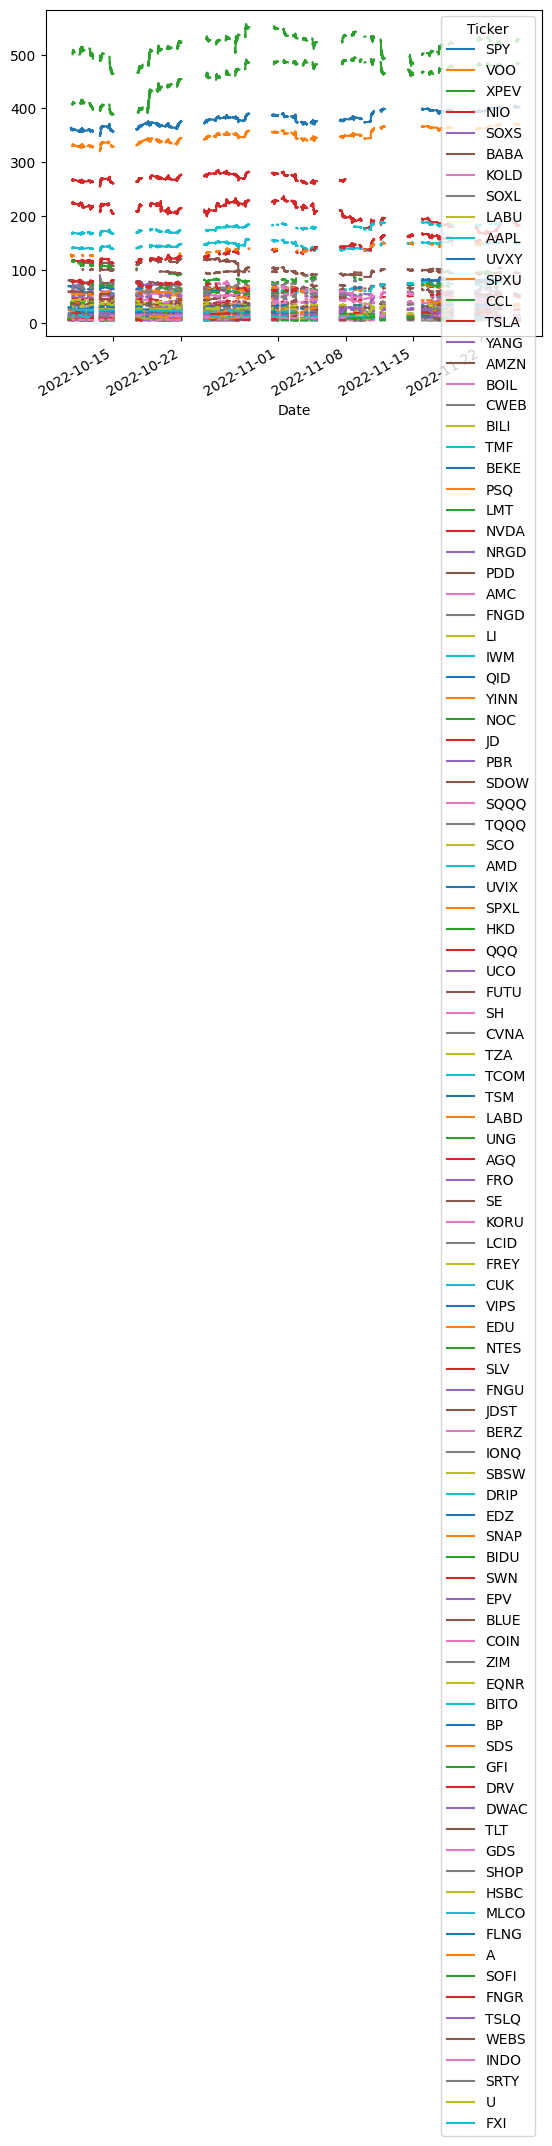

In [191]:
final_minute.plot()

<Axes: xlabel='Date'>

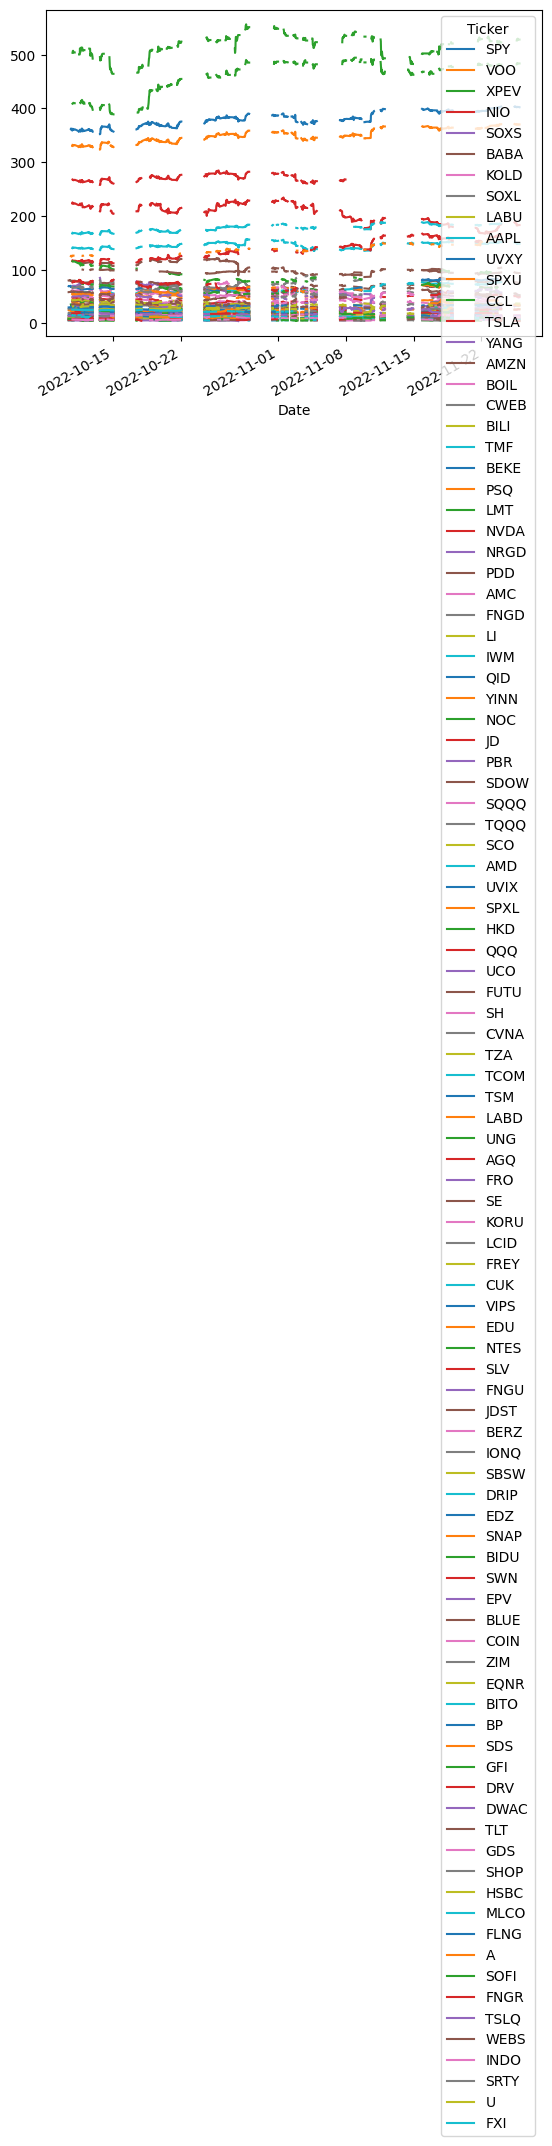

In [192]:
final_Hhour.plot()

<Axes: xlabel='Date'>

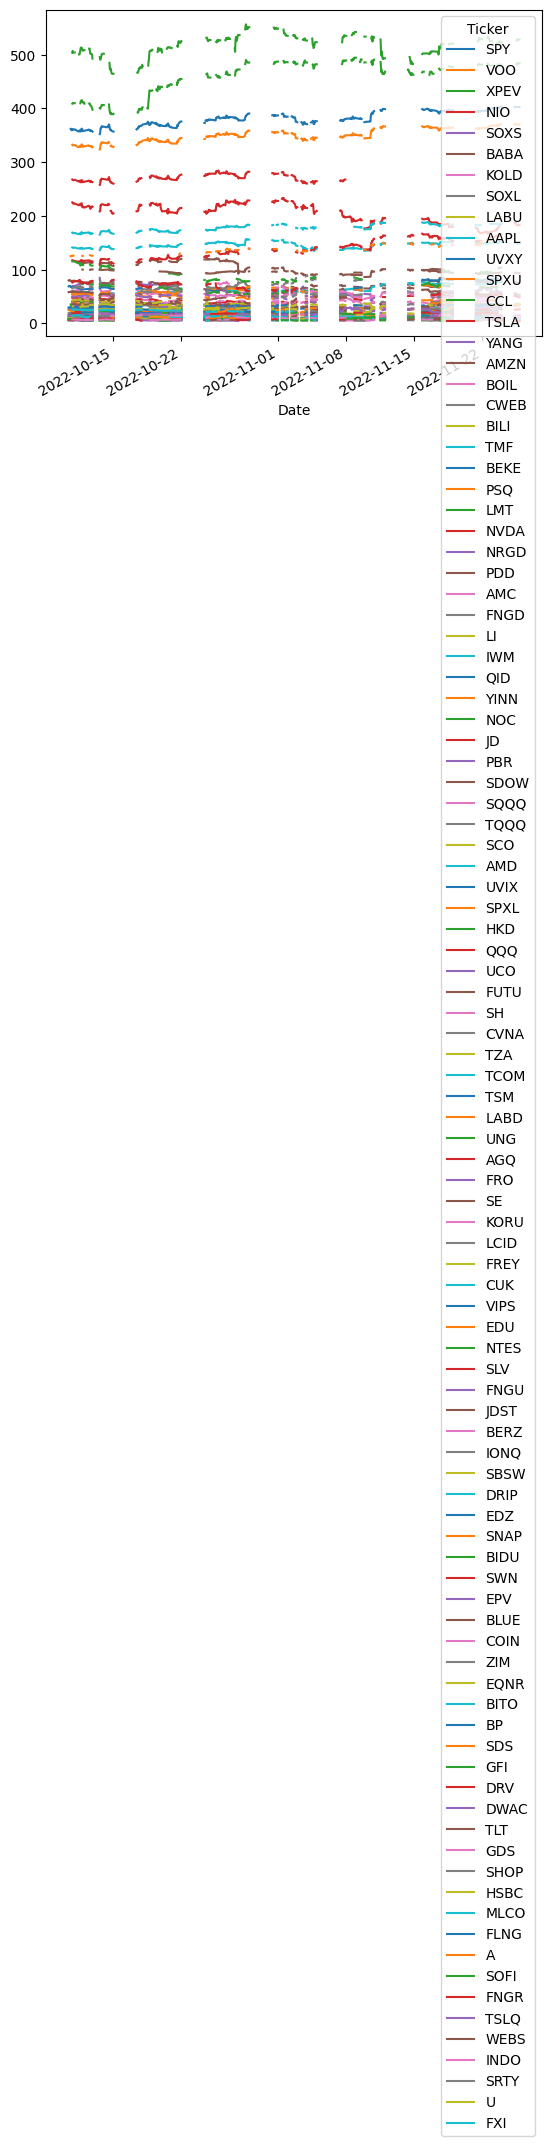

In [193]:
final_hour.plot()